Can we cluster players by performance and demographic attributes using K-Means?

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_excel('Desktop/football project/performance_1.xlsx')
df

,appearance_id,game_id,player_id_x,Date of birth,Age,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,...,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,aggregate,competition_type
0,2224728_119169,2224728,119169,1990-11-10,35.0,2012-07-13,Aron Johannsson,DK1,0,0,...,7,Peter Rensen,Kent Nielsen,Ceres Park,9728,Michael Svendsen,Aarhus Gymnastik Forening,Aalborg BK,01:01:00,domestic_league
1,2224732_161244,2224732,161244,1988-10-20,37.0,2012-07-14,Conor O'Brien,DK1,0,0,...,12,Lars Sondergaard,Colin Todd,Sydbank Park,2995,Claus Bo Larsen,Sonderjyske Fc,Randers Fodbold Club,06:01:00,domestic_league
2,2224729_39467,2224729,39467,1982-05-17,43.0,2012-07-15,Clarence Goodson,DK1,0,0,...,5,Auri Skarbalius,Troels Bech,Brondby Stadium,10806,Lars Christoffersen,Brondby IF,Odense Boldklub,00:01:00,domestic_league
3,2232104_119169,2232104,119169,1990-11-10,35.0,2012-07-19,Aron Johannsson,ELQ,0,0,...,Unknown,Peter Rensen,Temur Shalamberidze,Ceres Park,9000,Boako Jovanetic,Aarhus Gymnastik Forening,Unknown,01:02:00,international_cup
4,2219794_39475,2219794,39475,1985-09-09,40.0,2012-07-22,Sacha Kljestan,BESC,0,0,...,Unknown,John van den Brom,Peter Maes,Constant Vanden Stock Stadion,14485,Laurent Colemonts,Royal Sporting Club Anderlecht,KSC Lokeren (- 2020),03:02:00,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,3415291_537467,3415291,537467,1996-08-29,29.0,2020-09-26,Joseph Efford,BE1,0,0,...,18,Hernan Losada,Nicky Hayen,Olympisch Stadion,3200,Wesli De Cremer,Beerschot V.A.,SK Beveren,03:02:00,domestic_league
3805,3415296_367423,3415296,367423,2000-02-08,25.0,2020-09-26,Chris Durkin,BE1,1,0,...,16,Wouter Vrancken,Kevin Muscat,AFAS Stadion,5185,Nathan Verboomen,Yellow-Red Koninklijke Voetbalclub Mechelen,Koninklijke Sint-Truidense Voetbalvereniging,02:00:00,domestic_league
3806,3431983_478940,3431983,478940,1998-06-11,27.0,2020-09-26,Reggie Cannon,PO1,0,0,...,1,Vasco Seabra,Sergio Conceicao,Estádio do Bessa,27095,Luís Godinho,Boavista Futebol Clube,Futebol Clube do Porto,00:05:00,domestic_league
3807,3450575_361104,3450575,361104,2000-11-03,25.0,2020-09-26,Sergino Dest,NL1,0,0,...,6,Erik ten Hag,Thomas Letsch,Johan Cruijff ArenA,15000,Pol van Boekel,AFC Ajax Amsterdam,Stichting Betaald Voetbal Vitesse Arnhem,02:01:00,domestic_league


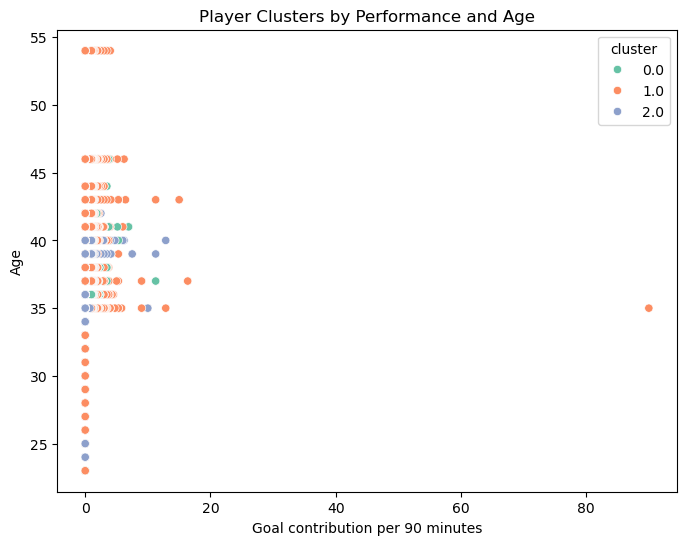

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your dataset
# Select relevant features
features = ['Age', 'goals', 'assists', 'minutes_played', 'Goal contribution per 90 minutes']
X = df[features].dropna()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means (choose k=3 for example)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df.loc[X.index, 'cluster'] = clusters

# Visualize clusters (2 features example: Goal contribution vs Age)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Goal contribution per 90 minutes', y='Age', hue='cluster', palette='Set2', data=df)
plt.title("Player Clusters by Performance and Age")
plt.show()


Do younger players outperform older players in certain metrics?

In [12]:
# Create age groups
df['age_group'] = pd.cut(df['Age'], bins=[0,24,30,100], labels=['young','mid','older'])

# Calculate average performance per group
avg_perf = df.groupby('age_group')[['Goal contribution per 90 minutes','goals','assists']].mean()
print(avg_perf)



           Goal contribution per 90 minutes     goals   assists
age_group                                                      
young                              0.000000  0.172414  0.137931
mid                                0.000000  0.157520  0.088415
older                              0.466795  0.145005  0.070892


C:\Users\Lavyna\AppData\Local\Temp\ipykernel_6920\3657157461.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_perf = df.groupby('age_group')[['Goal contribution per 90 minutes','goals','assists']].mean()


In [14]:
from scipy.stats import f_oneway

young = df[df['age_group']=='young']['Goal contribution per 90 minutes']
mid = df[df['age_group']=='mid']['Goal contribution per 90 minutes']
older = df[df['age_group']=='older']['Goal contribution per 90 minutes']

f_stat, p_value = f_oneway(young, mid, older)
print("F-statistic:", f_stat, "p-value:", p_value)


F-statistic: 26.48465931450325 p-value: 3.777679608366837e-12


Are players from certain leagues taller/faster/stronger statistically? # repeat the questions once again got wrong ans

In [24]:
avg_perf_comp = df.groupby('competition_type')[['goals','assists','Goal contribution per 90 minutes']].mean()
print(avg_perf_comp)


                      goals   assists  Goal contribution per 90 minutes
competition_type                                                       
domestic_cup       0.304029  0.095238                          0.222445
domestic_league    0.138079  0.071494                          0.337086
international_cup  0.104478  0.104478                          0.491077
other              0.444444  0.222222                          1.428571


In [26]:
from scipy.stats import f_oneway

# Separate data by competition type
league_gc = df[df['competition_type']=='League']['Goal contribution per 90 minutes']
cup_gc = df[df['competition_type']=='Cup']['Goal contribution per 90 minutes']
friendly_gc = df[df['competition_type']=='Friendly']['Goal contribution per 90 minutes']

f_stat, p_value = f_oneway(league_gc, cup_gc, friendly_gc)
print("F-statistic:", f_stat, "p-value:", p_value)


F-statistic: nan p-value: nan


C:\Users\Lavyna\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [22]:
df['Goal contribution per 90 minutes'] = df['Goal contribution per 90 minutes'].fillna(0)
